In [2]:
# import neccessary python liberaries
import os
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

sys.path.insert(0, os.path.dirname(os.getcwd()))

from src.stockAnalysis import *
from scripts.utils import *

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# load  Data 
file_path='../data/raw_analyst_ratings.csv'
# create an object
text_analyser=StockMarketAnalysis(file_path)
text_analyser.load_data()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [5]:
# data quality check
text_analyser.check_data_quality()

Missing values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

 Number of duplicates: 0

 Data types:
Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object


In [6]:
# Drop column name "Unnamed"
text_analyser.drop_unnamed_column()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [7]:
# headline length statistics
summery=text_analyser.headline_length_stats()
print(summery)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [8]:
# Count the number of articles per publisher to identify which publishers are most active.
articles_per_publisher=text_analyser.article_per_publisher()
articles_per_publisher

Article Counts per Publisher:


,Publisher,Article Count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,MoneyGeek,1
1030,muathe,1
1031,Robert Morris,1
1032,LeftCoastHedgie,1


In [9]:
articles_over_time, articles_by_day = text_analyser.analyze_publication_dates()
print("Articles over time: \n", articles_over_time)
print("Articles by day: \n", articles_by_day)

Articles over time: 
        year  month  article_count
0    2011.0    4.0              6
1    2011.0    5.0             78
2    2011.0    6.0             95
3    2011.0    7.0            137
4    2011.0    8.0            149
..      ...    ...            ...
106  2020.0    2.0           2355
107  2020.0    3.0           4681
108  2020.0    4.0           4616
109  2020.0    5.0           9333
110  2020.0    6.0           5990

[111 rows x 3 columns]
Articles by day: 
 day_of_week
Thursday     12712
Wednesday    11873
Tuesday      11037
Monday       10297
Friday        9407
Sunday         388
Saturday       273
Name: count, dtype: int64


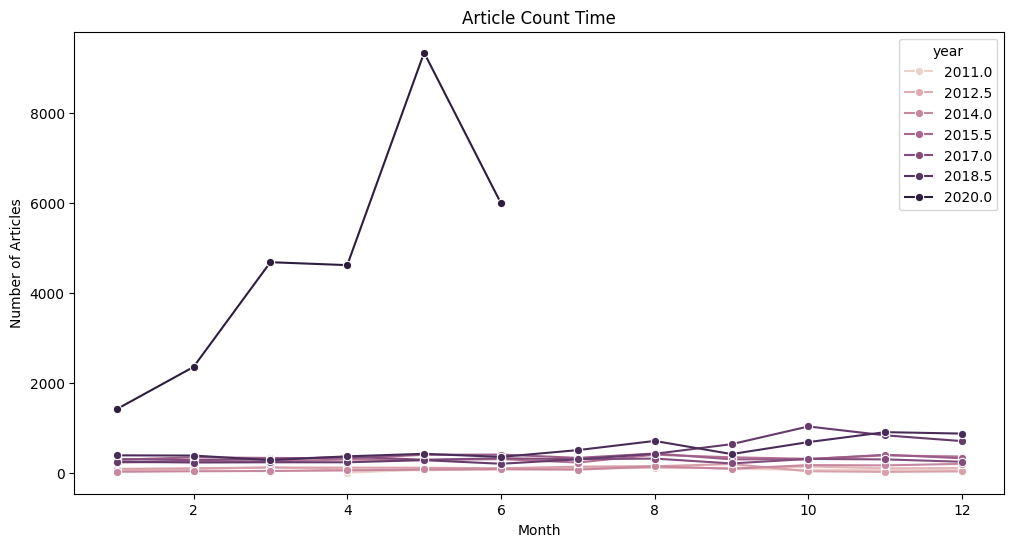

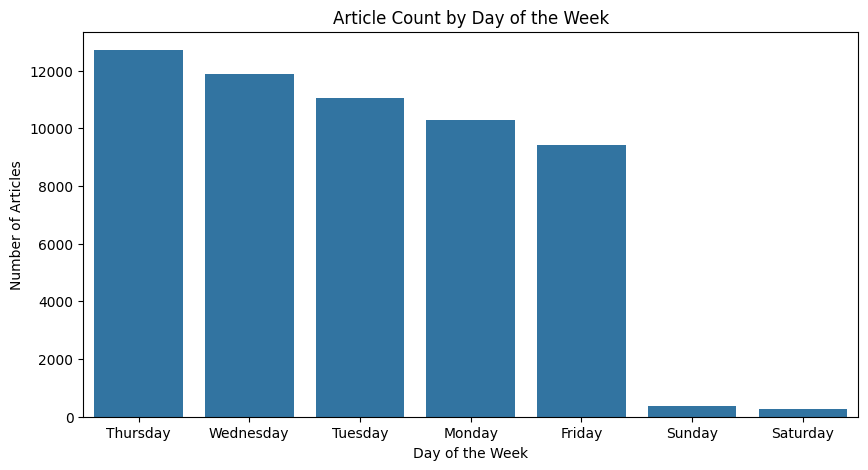

In [10]:
text_analyser.plot_article_trends(articles_over_time, articles_by_day)


In [11]:
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [12]:
cleand_data=text_analyser.text_preprocess()
cleand_data

,headline,url,publisher,date,stock,headline_length,year,month,day_of_week,cleaned_headline
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020.0,6.0,Friday,stocks hit week highs friday
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020.0,6.0,Wednesday,stocks hit week highs wednesday
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020.0,5.0,Tuesday,biggest movers friday
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020.0,5.0,Friday,stocks moving fridays midday session
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020.0,5.0,Friday,b securities maintains neutral agilent technol...
...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,38,NaN,NaN,NaN,top narrow based indexes august
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,52,NaN,NaN,NaN,recap wednesdays top percentage gainers losers
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,56,NaN,NaN,NaN,update oppenheimer color china zenix auto init...
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,54,NaN,NaN,NaN,oppenheimer initiates china zenix outperform pt


In [13]:
# get sentiment
result=text_analyser.get_sentiment()
result

,headline,url,publisher,date,stock,headline_length,year,month,day_of_week,cleaned_headline,polarity,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020.0,6.0,Friday,stocks hit week highs friday,0.00,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020.0,6.0,Wednesday,stocks hit week highs wednesday,0.00,Neutral
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020.0,5.0,Tuesday,biggest movers friday,0.00,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020.0,5.0,Friday,stocks moving fridays midday session,0.00,Neutral
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020.0,5.0,Friday,b securities maintains neutral agilent technol...,0.00,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,38,NaN,NaN,NaN,top narrow based indexes august,0.15,positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,52,NaN,NaN,NaN,recap wednesdays top percentage gainers losers,0.15,positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,56,NaN,NaN,NaN,update oppenheimer color china zenix auto init...,0.00,Neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,54,NaN,NaN,NaN,oppenheimer initiates china zenix outperform pt,0.00,Neutral


sentiment
Neutral     969425
positive    329714
Negative    108189
Name: count, dtype: int64


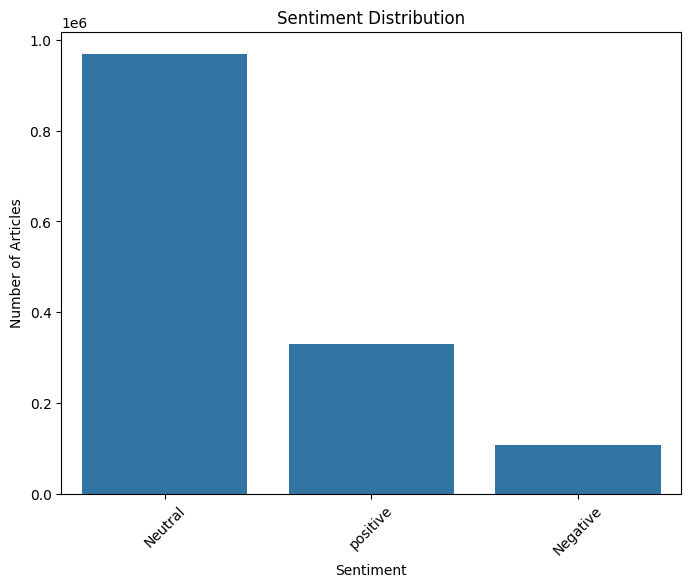

In [14]:
text_analyser.plot_sentiment_distribution() 


In [15]:
print(text_analyser.text_preprocess().columns)


Index(['headline', 'url', 'publisher', 'date', 'stock', 'headline_length',
       'year', 'month', 'day_of_week', 'cleaned_headline', 'polarity',
       'sentiment'],
      dtype='object')


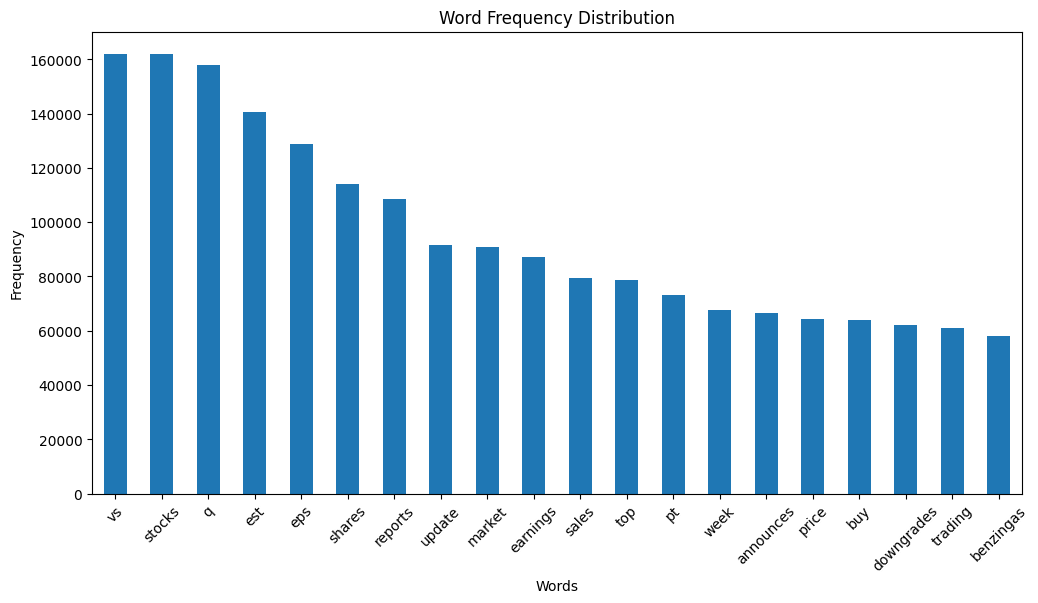

In [16]:
#common keywords or phrases
text_analyser.word_frequency()

In [17]:
keywords=text_analyser.extract_keywords()
print("Sentiment Analysis Results:")
print("\nExtracted Keywords:")
print(keywords)

Sentiment Analysis Results:

Extracted Keywords:
['eps' 'est' 'shares' 'stocks' 'vs']


In [18]:
# Topic Modeling
topics = text_analyser.perform_topic_modeling()
print("\nIdentified Topics:")
print(topics)


Identified Topics:
['Topic 1: stocks, vs', 'Topic 2: downgrades, upgrades']


In [19]:
# Time series analysis
publicationFrequency, publishingTimes = text_analyser.analyze_time_series()
print(publicationFrequency)
print(publishingTimes)

date
2011-04-28 01:01:48+00:00    1
2011-04-28 17:49:29+00:00    1
2011-04-28 19:00:36+00:00    1
2011-04-29 17:47:06+00:00    1
2011-04-29 20:11:05+00:00    1
                            ..
2020-06-11 20:49:41+00:00    1
2020-06-11 20:51:33+00:00    1
2020-06-11 21:01:39+00:00    1
2020-06-11 21:11:20+00:00    1
2020-06-11 21:12:35+00:00    1
Name: count, Length: 36011, dtype: int64
hour
0.0      131
1.0       82
2.0       48
3.0       27
4.0       67
5.0       14
6.0       57
7.0       93
8.0     1469
9.0     1829
10.0    2476
11.0    5033
12.0    5527
13.0    5965
14.0    7669
15.0    5701
16.0    5732
17.0    2710
18.0    2075
19.0    1612
20.0    3939
21.0    2800
22.0     704
23.0     227
Name: count, dtype: int64


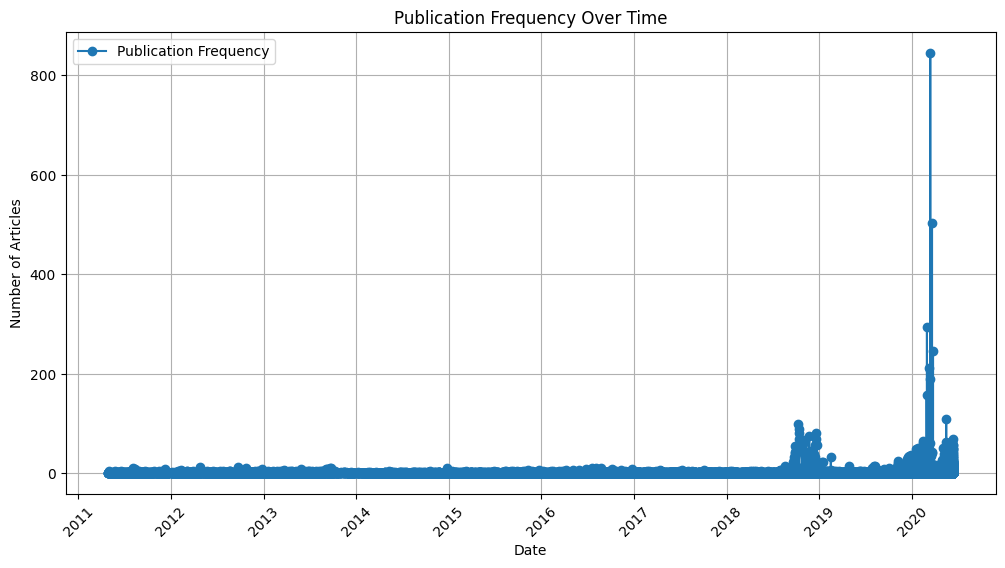

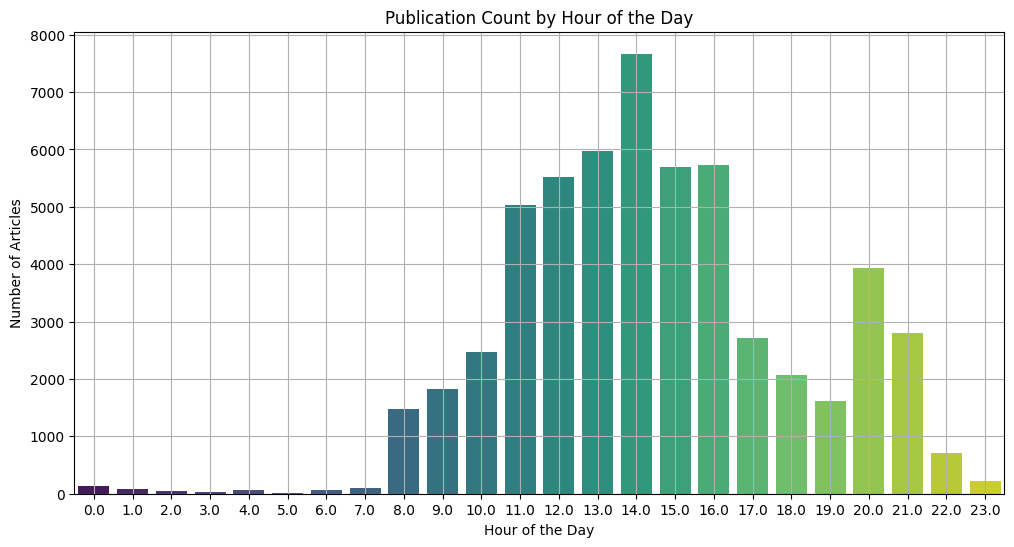

In [20]:
# Plot the time series trends
text_analyser.plot_time_series_trends(publicationFrequency, publishingTimes)


In [21]:
# Analyze publishers
top_with_domain, top_publishers, top_domains = text_analyser.analyze_publishers()
print(top_with_domain,'\n')
print('-------------------------------------------------------------------------')
print(top_publishers,'\n')
print('-------------------------------------------------------------------------')
print(top_domains)


publisher
luke@benzinga.com                             5198
vishwanath@benzinga.com                       1830
bret.kenwell@benzinga.com                      896
vivek.proactive@gmail.com                      120
richa28dhand@gmail.com                          17
Andy@andyswan.com                                5
newsdesk+benzingastaffwriter3@benzinga.com       3
aefimoff@benzinga.com                            3
shivdeep@benzinga.com                            3
kiana@investdiva.com                             2
andrewbeghou@benzinga.com                        2
andrew@tothetick.com                             2
jennifer25anthony@gmail.com                      2
adam@eosdetroit.io                               1
dhiraj.surapaneni@benzinga.com                   1
javierhasseandericterbush@benzinga.com           1
vic@forextraininggroup.com                       1
official@stockmetrix.net                         1
Name: count, dtype: int64 

--------------------------------------------

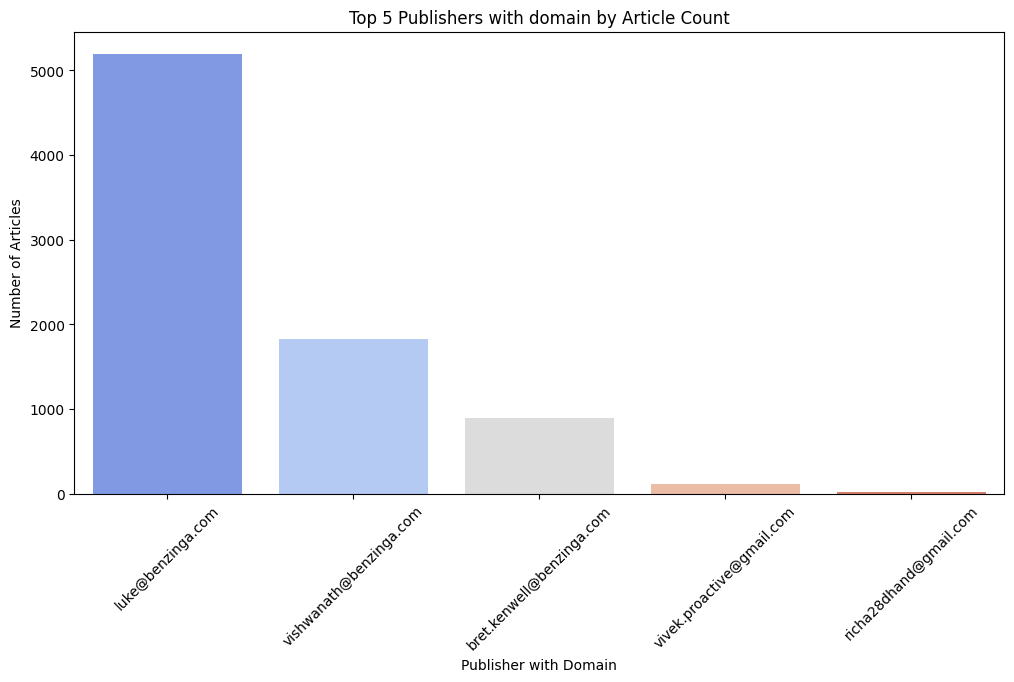

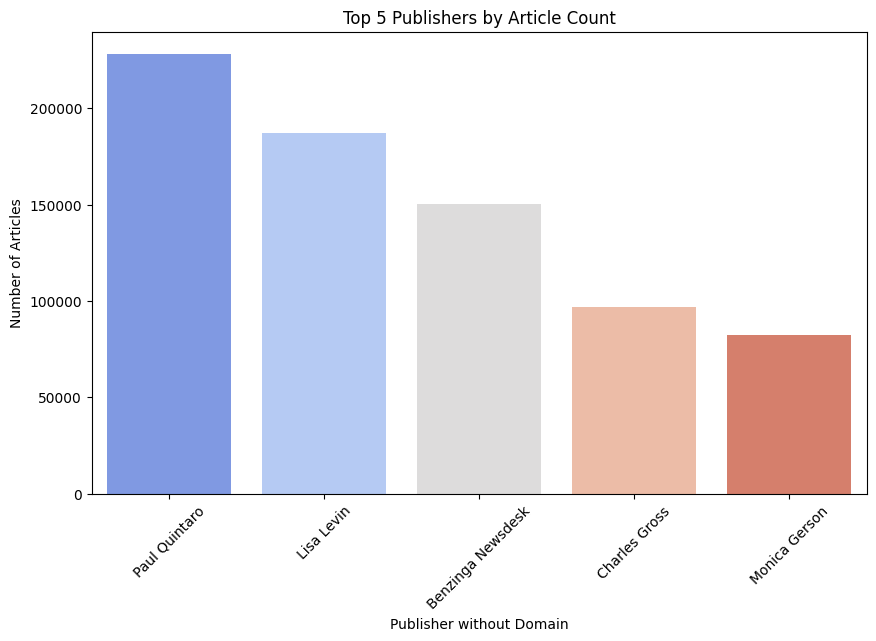

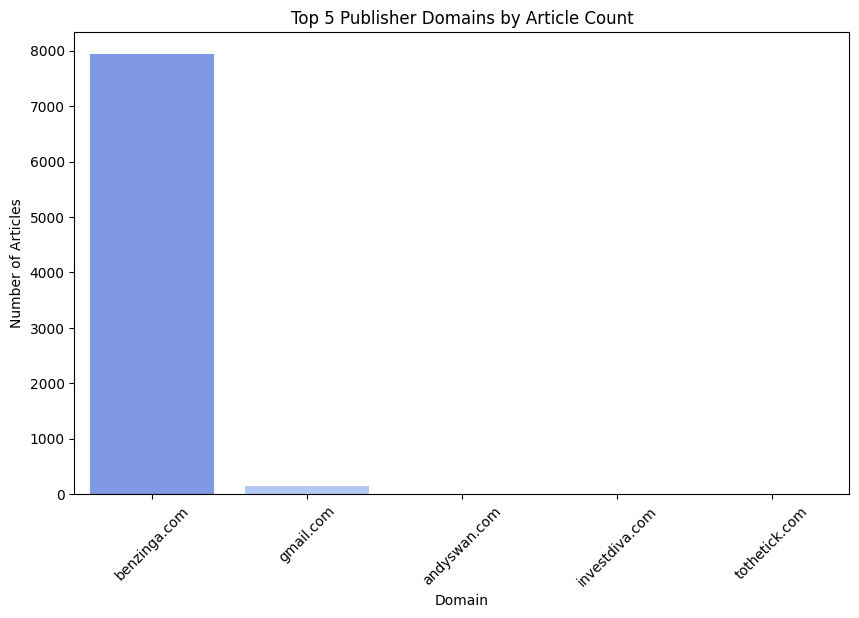

In [22]:
# Plot publisher analysis
text_analyser.plot_publisher_analysis(top_with_domain, top_publishers, top_domains)
